# Analysis using R in jupyter notebook

#Packages required

In [1]:
library(dplyr)
library(ggplot2)
library(rpart)
library(rpart.plot)
library(pROC)
library(lattice)
library(rattle)

Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'rpart' was built under R version 3.5.2"Warning message:
"package 'rpart.plot' was built under R version 3.5.2"Warning message:
"package 'pROC' was built under R version 3.5.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'lattice' was built under R version 3.5.3"Warning message:
"package 'rattle' was built under R version 3.5.2"Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [2]:
library(ROCR)
library(klaR)
library(caret)
library(pastecs)
library(Boruta)

Warning message:
"package 'ROCR' was built under R version 3.5.3"Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'klaR' was built under R version 3.5.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.5.3"
Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message:
"package 'pastecs' was built under R version 3.5.3"
Attaching package: 'pastecs'

The following objects are masked from 'package:dplyr':

    first, last

Warning message:
"package 'Boruta' was built under R version 3.5.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.5.2"
Attaching package: 'ranger'

The following object is masked from 'package:rattle':

    importance



In [3]:
install.packages('Hmisc', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/suji/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\suji\AppData\Local\Temp\RtmpEbyzs8\downloaded_packages


In [4]:
library(Hmisc)

Warning message:
"package 'Hmisc' was built under R version 3.5.3"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

The following object is masked from 'package:rpart':

    solder

Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



#Reading Data file

In [5]:
wdbc<-read.csv(file="Desktop/wdbc.csv", header = F,sep=",")
print(wdbc)


           V1 V2     V3    V4     V5     V6      V7      V8        V9      V10
1      842302  M 17.990 10.38 122.80 1001.0 0.11840 0.27760 0.3001000 0.147100
2      842517  M 20.570 17.77 132.90 1326.0 0.08474 0.07864 0.0869000 0.070170
3    84300903  M 19.690 21.25 130.00 1203.0 0.10960 0.15990 0.1974000 0.127900
4    84348301  M 11.420 20.38  77.58  386.1 0.14250 0.28390 0.2414000 0.105200
5    84358402  M 20.290 14.34 135.10 1297.0 0.10030 0.13280 0.1980000 0.104300
6      843786  M 12.450 15.70  82.57  477.1 0.12780 0.17000 0.1578000 0.080890
7      844359  M 18.250 19.98 119.60 1040.0 0.09463 0.10900 0.1127000 0.074000
8    84458202  M 13.710 20.83  90.20  577.9 0.11890 0.16450 0.0936600 0.059850
9      844981  M 13.000 21.82  87.50  519.8 0.12730 0.19320 0.1859000 0.093530
10   84501001  M 12.460 24.04  83.97  475.9 0.11860 0.23960 0.2273000 0.085430
11     845636  M 16.020 23.24 102.70  797.8 0.08206 0.06669 0.0329900 0.033230
12   84610002  M 15.780 17.89 103.60  781.0 0.09710 

#The columns were named with the information provided in wdbc.names file

In [6]:
features <- c("radius_", "texture_", "perimeter_", "area_", "smoothness_", "compactness_", "concavity_", "concave_points_", "symmetry_", "fractal_dimension_")
names(wdbc) <- c("ID", "Diagnosis", paste0(features,"mean"), paste0(features,"se"), paste0(features,"worst"))


#Understanding the data

In [7]:
ls(wdbc)
head(wdbc)
tail(wdbc)
str(wdbc)
dim(wdbc)
class(wdbc)
stat.desc(wdbc)

[1] "area_mean"               "area_se"                
 [3] "area_worst"              "compactness_mean"       
 [5] "compactness_se"          "compactness_worst"      
 [7] "concave_points_mean"     "concave_points_se"      
 [9] "concave_points_worst"    "concavity_mean"         
[11] "concavity_se"            "concavity_worst"        
[13] "Diagnosis"               "fractal_dimension_mean" 
[15] "fractal_dimension_se"    "fractal_dimension_worst"
[17] "ID"                      "perimeter_mean"         
[19] "perimeter_se"            "perimeter_worst"        
[21] "radius_mean"             "radius_se"              
[23] "radius_worst"            "smoothness_mean"        
[25] "smoothness_se"           "smoothness_worst"       
[27] "symmetry_mean"           "symmetry_se"            
[29] "symmetry_worst"          "texture_mean"           
[31] "texture_se"              "texture_worst"

ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
566,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
568,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
569,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


'data.frame':	569 obs. of  32 variables:
 $ ID                     : int  842302 842517 84300903 84348301 84358402 843786 844359 84458202 844981 84501001 ...
 $ Diagnosis              : Factor w/ 2 levels "B","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave_points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se            

[1] 569  32

[1] "data.frame"

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
nbr.val,5.690000e+02,NA,569.0000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,569.0000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
nbr.null,0.000000e+00,NA,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,...,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01,1.300000e+01,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,NA,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
min,8.670000e+03,NA,6.9810000,9.710000e+00,4.379000e+01,1.435000e+02,5.263000e-02,1.938000e-02,0.000000e+00,0.000000e+00,...,7.9300000,1.202000e+01,5.041000e+01,1.852000e+02,7.117000e-02,2.729000e-02,0.000000e+00,0.000000e+00,1.565000e-01,5.504000e-02
max,9.113205e+08,NA,28.1100000,3.928000e+01,1.885000e+02,2.501000e+03,1.634000e-01,3.454000e-01,4.268000e-01,2.012000e-01,...,36.0400000,4.954000e+01,2.512000e+02,4.254000e+03,2.226000e-01,1.058000e+00,1.252000e+00,2.910000e-01,6.638000e-01,2.075000e-01
range,9.113118e+08,NA,21.1290000,2.957000e+01,1.447100e+02,2.357500e+03,1.107700e-01,3.260200e-01,4.268000e-01,2.012000e-01,...,28.1100000,3.752000e+01,2.007900e+02,4.068800e+03,1.514300e-01,1.030710e+00,1.252000e+00,2.910000e-01,5.073000e-01,1.524600e-01
sum,1.728157e+10,NA,8038.4290000,1.097581e+04,5.233038e+04,3.726319e+05,5.482900e+01,5.937002e+01,5.052681e+01,2.783499e+01,...,9257.1690000,1.461034e+04,6.103163e+04,5.010518e+05,7.531773e+01,1.446768e+02,1.548752e+02,6.521094e+01,1.650530e+02,4.776517e+01
median,9.060240e+05,NA,13.3700000,1.884000e+01,8.624000e+01,5.511000e+02,9.587000e-02,9.263000e-02,6.154000e-02,3.350000e-02,...,14.9700000,2.541000e+01,9.766000e+01,6.865000e+02,1.313000e-01,2.119000e-01,2.267000e-01,9.993000e-02,2.822000e-01,8.004000e-02
mean,3.037183e+07,NA,14.1272917,1.928965e+01,9.196903e+01,6.548891e+02,9.636028e-02,1.043410e-01,8.879932e-02,4.891915e-02,...,16.2691898,2.567722e+01,1.072612e+02,8.805831e+02,1.323686e-01,2.542650e-01,2.721885e-01,1.146062e-01,2.900756e-01,8.394582e-02
SE.mean,5.241136e+06,NA,0.1477358,1.803088e-01,1.018666e+00,1.475301e+01,5.895989e-04,2.214026e-03,3.342028e-03,1.626700e-03,...,0.2026200,2.576645e-01,1.408692e+00,2.386869e+01,9.571852e-04,6.595889e-03,8.745985e-03,2.755643e-03,2.593619e-03,7.571677e-04


#Checking missing values

In [8]:
sapply(wdbc, function(y) sum(is.na(y)))

ID               Diagnosis             radius_mean 
                      0                       0                       0 
           texture_mean          perimeter_mean               area_mean 
                      0                       0                       0 
        smoothness_mean        compactness_mean          concavity_mean 
                      0                       0                       0 
    concave_points_mean           symmetry_mean  fractal_dimension_mean 
                      0                       0                       0 
              radius_se              texture_se            perimeter_se 
                      0                       0                       0 
                area_se           smoothness_se          compactness_se 
                      0                       0                       0 
           concavity_se       concave_points_se             symmetry_se 
                      0                       0                       0 
   fractal_dimension_se            radius_worst           texture_worst 
                      0                       0                       0 
        perimeter_worst              area_worst        smoothness_worst 
                      0                       0                       0 
      compactness_worst         concavity_worst    concave_points_worst 
                      0                       0                       0 
         symmetry_worst fractal_dimension_worst 
                      0                       0

#Exploratory Analysis
#Proportion of the classes of target variable in the data

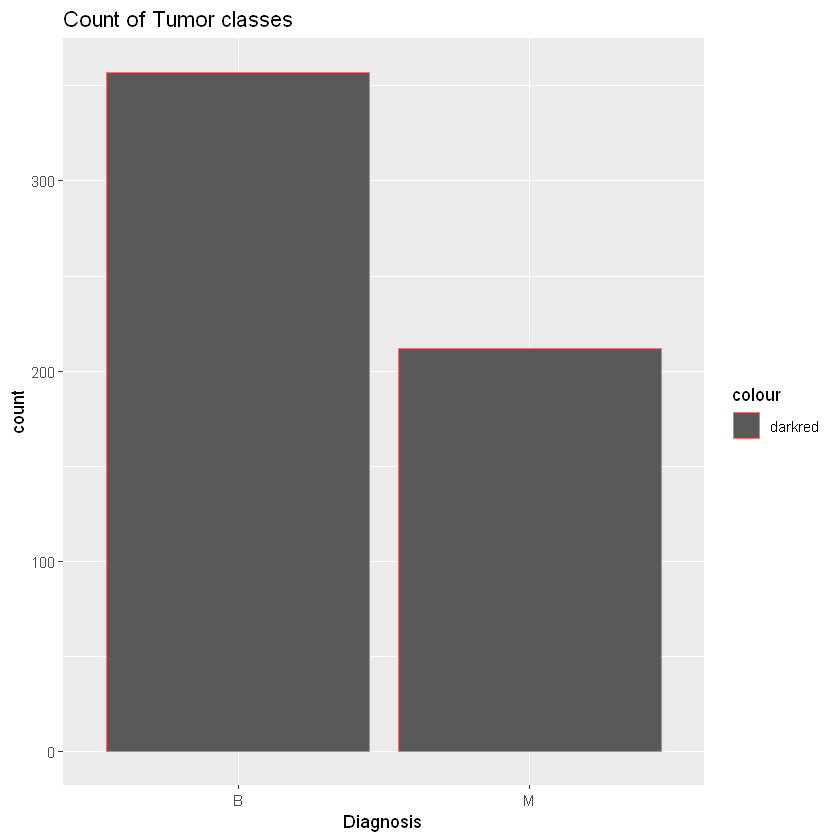

In [9]:
ggplot(data = wdbc) +
  ggtitle("Count of Tumor classes") +
  geom_bar(mapping = aes(x = Diagnosis,color="darkred"))

#Understanding the nature of Benign and Malignant tumours with repect to radius and smoothness

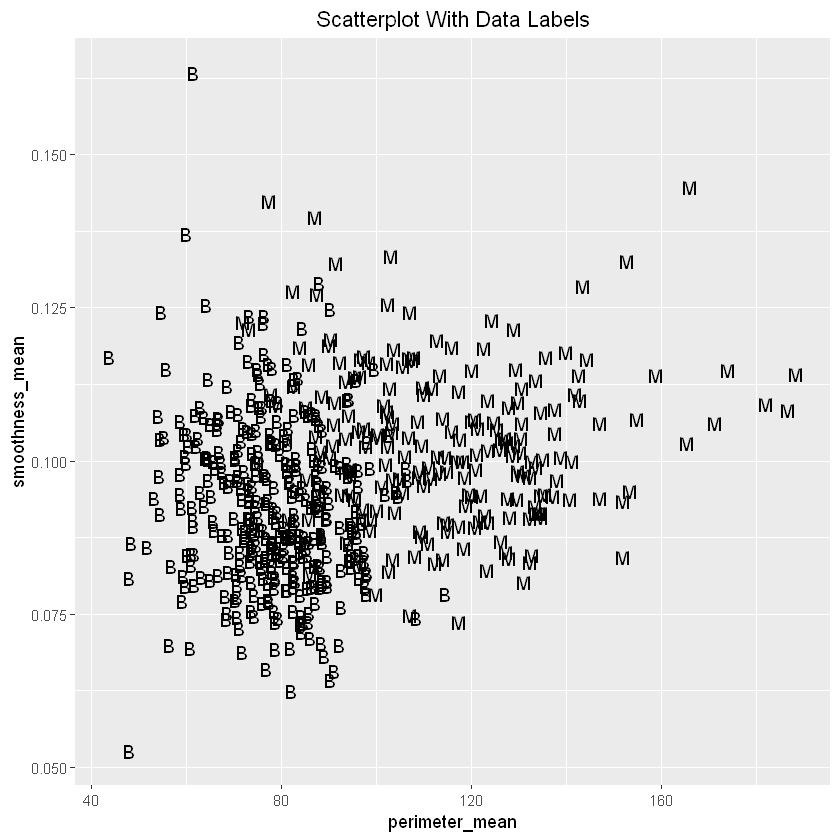

In [10]:
ggplot(wdbc, aes(x = perimeter_mean, y = smoothness_mean)) +
    geom_text(aes(label = Diagnosis), size = 4) +
    ggtitle("Scatterplot With Data Labels") +
    theme(plot.title = element_text(hjust = 0.5))

#Correlation matrix of data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,0.57,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,0.34,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave_points_mean,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,0.17,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,0.48,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44
fractal_dimension_mean,-0.31,-0.08,-0.26,-0.28,0.58,0.57,0.34,0.17,0.48,1.00,...,-0.25,-0.05,-0.21,-0.23,0.50,0.46,0.35,0.18,0.33,0.77


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000000,0.323781891,0.997855281,0.987357170,0.17058119,0.50612358,0.67676355,0.82252852,0.14774124,-0.3116308263,...,0.96953897,0.297007644,0.965136514,0.94108246,0.11961614,0.41346282,0.52691146,0.7442142,0.16395333,0.007065886
texture_mean,0.323781891,1.000000000,0.329533059,0.321085696,-0.02338852,0.23670222,0.30241783,0.29346405,0.07140098,-0.0764371834,...,0.35257295,0.912044589,0.358039575,0.34354595,0.07750336,0.27782959,0.30102522,0.2953158,0.10500791,0.119205351
perimeter_mean,0.997855281,0.329533059,1.000000000,0.986506804,0.20727816,0.55693621,0.71613565,0.85097704,0.18302721,-0.2614769081,...,0.96947636,0.303038372,0.970386887,0.94154981,0.15054940,0.45577423,0.56387926,0.7712408,0.18911504,0.051018530
area_mean,0.987357170,0.321085696,0.986506804,1.000000000,0.17702838,0.49850168,0.68598283,0.82326887,0.15129308,-0.2831098117,...,0.96274609,0.287488627,0.959119574,0.95921333,0.12352294,0.39041031,0.51260592,0.7220166,0.14356991,0.003737597
smoothness_mean,0.170581187,-0.023388516,0.207278164,0.177028377,1.00000000,0.65912322,0.52198377,0.55369517,0.55777479,0.5847920019,...,0.21312014,0.036071799,0.238852626,0.20671836,0.80532420,0.47246844,0.43492571,0.5030534,0.39430948,0.499316369
compactness_mean,0.506123578,0.236702222,0.556936211,0.498501682,0.65912322,1.00000000,0.88312067,0.83113504,0.60264105,0.5653686634,...,0.53531540,0.248132833,0.590210428,0.50960381,0.56554117,0.86580904,0.81627525,0.8155732,0.51022343,0.687382323
concavity_mean,0.676763550,0.302417828,0.716135650,0.685982829,0.52198377,0.88312067,1.00000000,0.92139103,0.50066662,0.3367833594,...,0.68823641,0.299878889,0.729564917,0.67598723,0.44882204,0.75496802,0.88410264,0.8613230,0.40946413,0.514929891
concave_points_mean,0.822528522,0.293464051,0.850977041,0.823268869,0.55369517,0.83113504,0.92139103,1.00000000,0.46249739,0.1669173832,...,0.83031763,0.292751713,0.855923128,0.80962962,0.45275305,0.66745368,0.75239950,0.9101553,0.37574415,0.368661134
symmetry_mean,0.147741242,0.071400980,0.183027212,0.151293079,0.55777479,0.60264105,0.50066662,0.46249739,1.00000000,0.4799213301,...,0.18572775,0.090650688,0.219168559,0.17719338,0.42667503,0.47320001,0.43372101,0.4302966,0.69982580,0.438413498
fractal_dimension_mean,-0.311630826,-0.076437183,-0.261476908,-0.283109812,0.58479200,0.56536866,0.33678336,0.16691738,0.47992133,1.0000000000,...,-0.25369149,-0.051269202,-0.205151211,-0.23185445,0.50494208,0.45879816,0.34623388,0.1753254,0.33401868,0.767296779


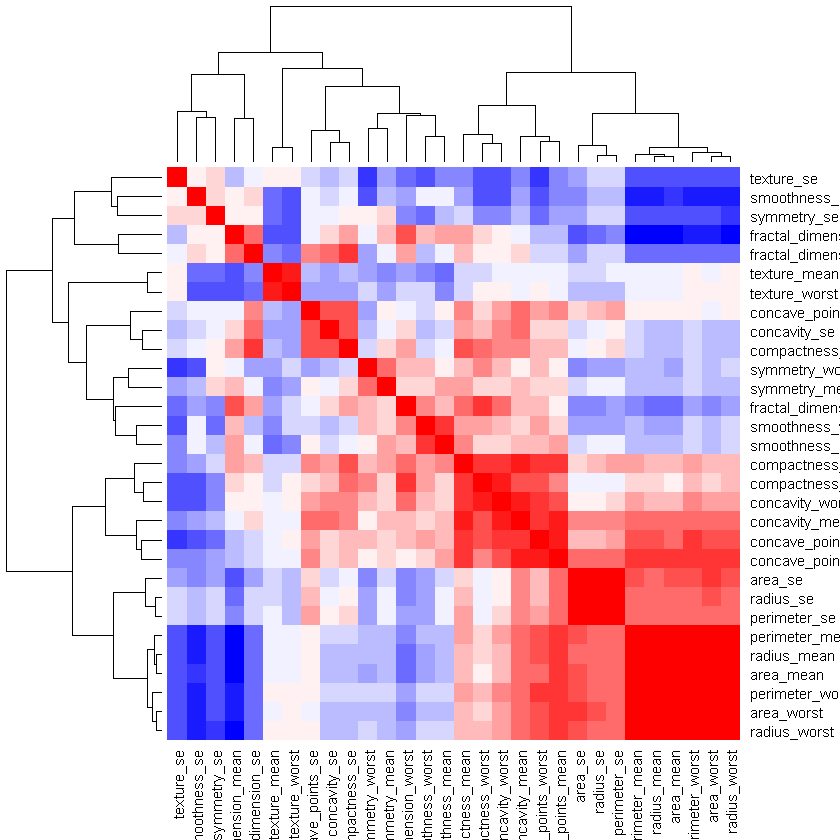

In [12]:
p<-wdbc
p[,1:2] = NULL
res <- cor(p)
round(res, 2)
res
col<- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res, col = col, symm = TRUE)

## Question 1.Descriptive & summary statistics like mean,median and standard deviation for perimeter


In [13]:
perimeter<-c('perimeter_mean','perimeter_worst')
wdbc_per<-wdbc[perimeter]
stat.desc(wdbc_per)

mean<-apply(wdbc_per[,1:2], 2, mean)
mean
median<-apply(wdbc_per[,1:2], 2, median)
median
standard_deviation<-apply(wdbc_per[,1:2], 2, sd)
standard_deviation

,perimeter_mean,perimeter_worst
nbr.val,5.690000e+02,5.690000e+02
nbr.null,0.000000e+00,0.000000e+00
nbr.na,0.000000e+00,0.000000e+00
min,4.379000e+01,5.041000e+01
max,1.885000e+02,2.512000e+02
range,1.447100e+02,2.007900e+02
sum,5.233038e+04,6.103163e+04
median,8.624000e+01,9.766000e+01
mean,9.196903e+01,1.072612e+02
SE.mean,1.018666e+00,1.408692e+00


perimeter_mean perimeter_worst 
       91.96903       107.26121

perimeter_mean perimeter_worst 
          86.24           97.66

perimeter_mean perimeter_worst 
       24.29898        33.60254

#Visualization of summary statistics

 perimeter_mean   perimeter_worst 
 Min.   : 43.79   Min.   : 50.41  
 1st Qu.: 75.17   1st Qu.: 84.11  
 Median : 86.24   Median : 97.66  
 Mean   : 91.97   Mean   :107.26  
 3rd Qu.:104.10   3rd Qu.:125.40  
 Max.   :188.50   Max.   :251.20  

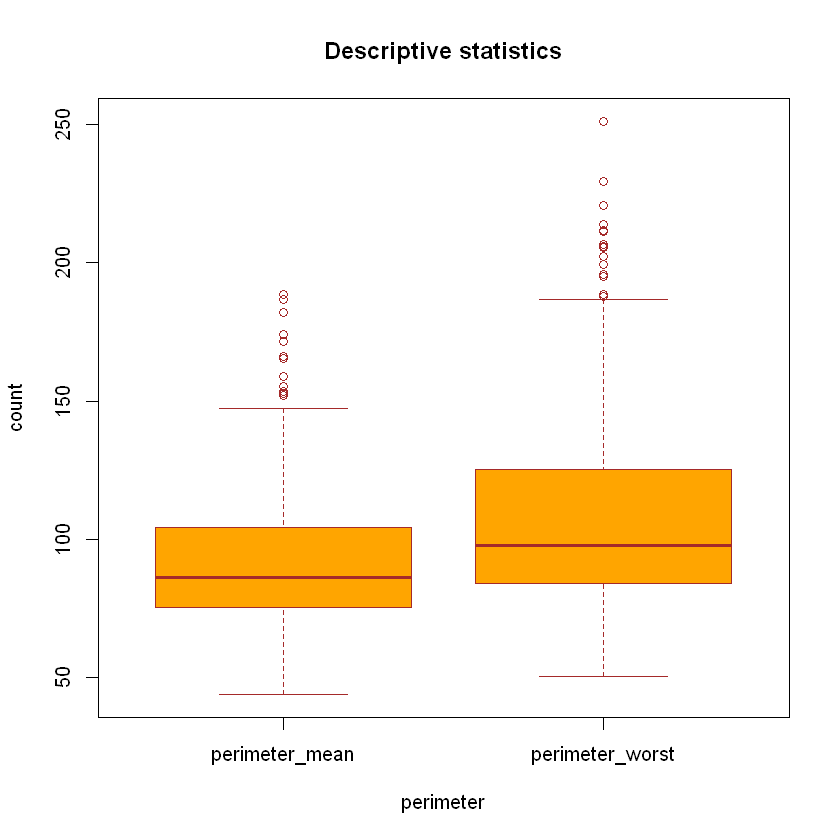

In [14]:
summary<-summary(wdbc_per)
summary
boxplot(wdbc_per,
        main = "Descriptive statistics",
        xlab = "perimeter",
        ylab = "count",
        col = "orange",
        border = "brown",
        notch = FALSE
)

## Question 2.Distribution of variable or feature "radius_mean" in the data

#Checking the Densities 

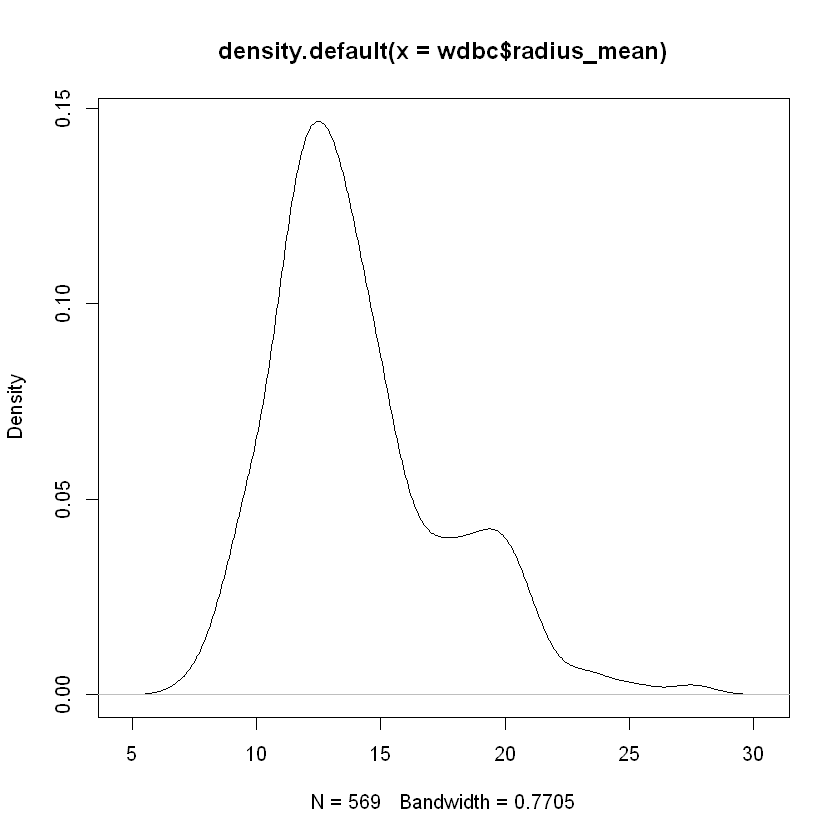

In [15]:
plot(density(wdbc$radius_mean))

#Test for normal distribution

In [16]:
shapiro.test(wdbc$radius_mean)


	Shapiro-Wilk normality test

data:  wdbc$radius_mean
W = 0.94107, p-value = 3.106e-14


#Plot with qqplot

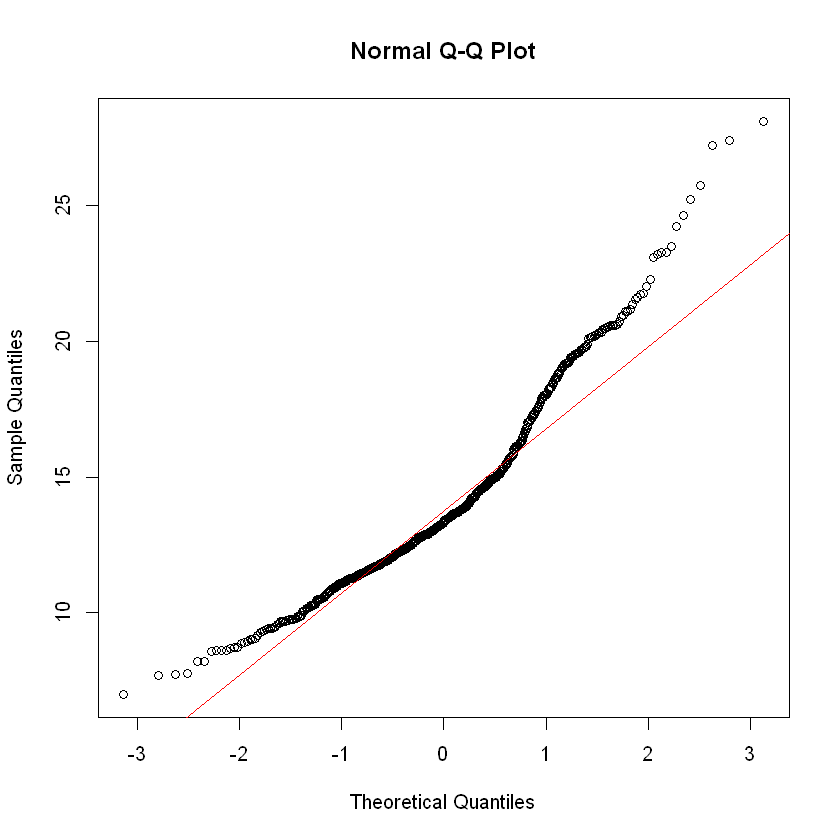

In [18]:
qqnorm(wdbc$radius_mean);qqline(wdbc$radius_mean, col = 2)

#Frequency distribution for Radius Visualization 

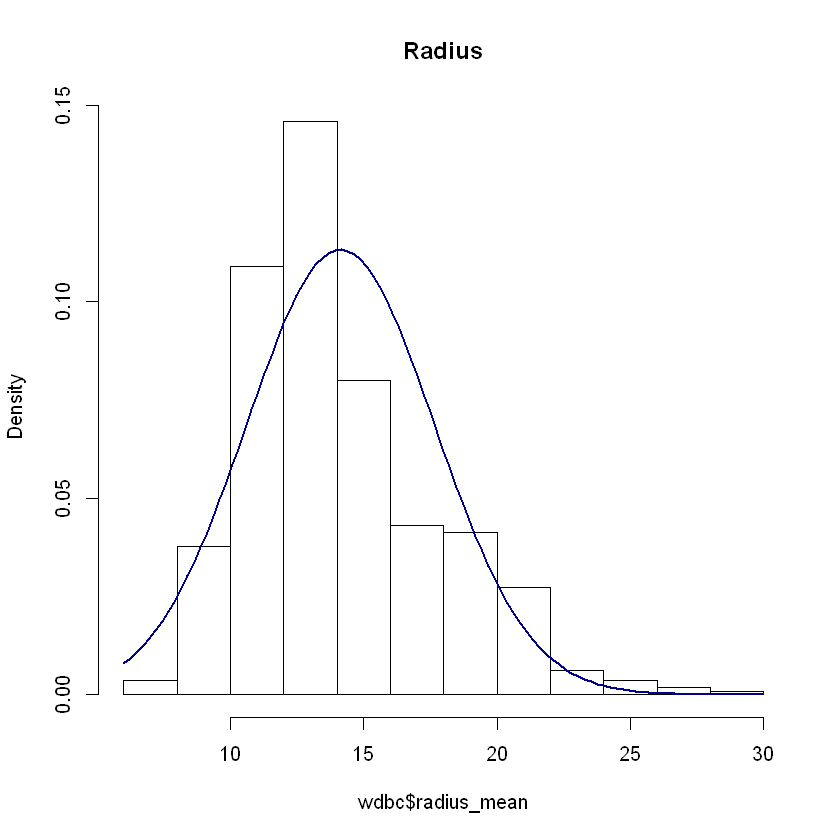

In [19]:
m<-mean(wdbc$radius_mean);std<-sqrt(var(wdbc$radius_mean))
hist(wdbc$radius_mean,prob=T,main="Radius")
curve(dnorm(x, mean=m, sd=std), col="darkblue", lwd=2, add=TRUE)

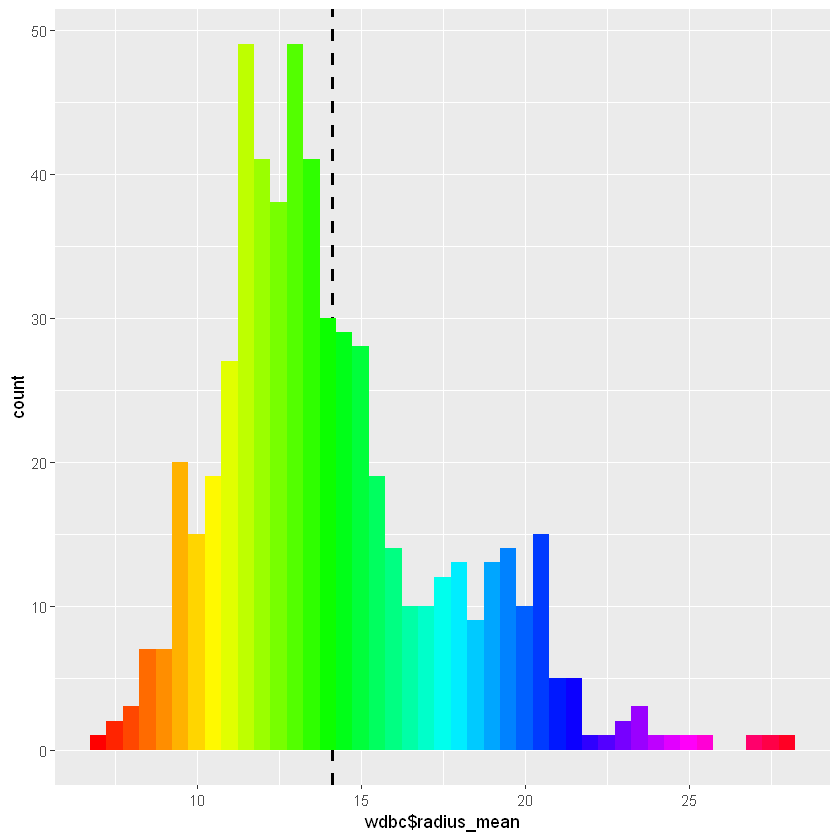

In [20]:
gg_b <- ggplot_build(
  ggplot() + geom_histogram(aes(x = wdbc$radius_mean), binwidth=.5)) 
nu_bins <- dim(gg_b$data[[1]])[1]
ggplot() + geom_vline(aes(xintercept = mean(wdbc$radius_mean)), 
                       linetype = "dashed", size = 1) + geom_histogram(aes(x = wdbc$radius_mean), binwidth=.5, fill = rainbow(nu_bins))


#Since histogram/qqplot returns a long right tail and Shapiro-Wilk normality test results in w value near to 1 while p value is less than 0.05, we can neither reject the null hypothesis nor conisder that it is normally distributed.
#A better approach would be testing for t- distribution by calculating student t test.

## Q3.Train a classifier to predict the diagnosis of malignant or benign


#Feature selection

ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
 11. run of importance source...
 12. run of importance source...
After 12 iterations, +9.6 secs: 
 confirmed 24 attributes: area_mean, area_se, area_worst, compactness_mean, compactness_se and 19 more;
 still have 6 attributes left.

 13. run of importance source...
 14. run of importance source...
 15. run of importance source...
 16. run of importance source...
 17. run of importance source...
 18. run of importance source...
 19. run of importance source...
 20. run of importance source...
After 20 iterations, +14 secs: 
 confirmed 2 attributes: fractal_dimension_mean, fractal_dimension_se;
 still have 4 attributes left.

 21. run of importance source...
 22. run of 

Boruta performed 99 iterations in 1.120276 mins.
 28 attributes confirmed important: area_mean, area_se, area_worst,
compactness_mean, compactness_se and 23 more;
 No attributes deemed unimportant.
 2 tentative attributes left: smoothness_se, symmetry_se;


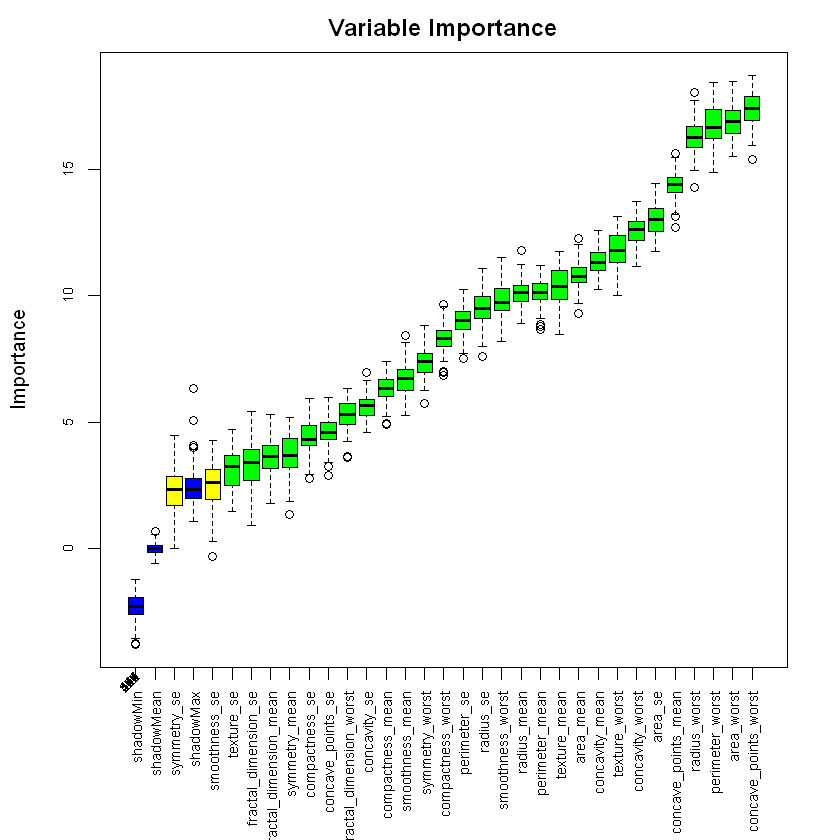

In [21]:
wdbc
wdbc[,1] = NULL
set.seed(456)
boruta_output <- Boruta(Diagnosis ~ ., data=na.omit(wdbc), doTrace=2)
boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])
print(boruta_output)
par(mar = c(7, 4, 2, 2) + 0.2)
plot(boruta_output, cex.axis=.7, las=3, xlab="", main="Variable Importance")
text(par("usr")[3]-0.25, 
     srt = 45, adj= 1, xpd = TRUE,
     labels = paste(rownames(wdbc)), cex=0.65)

#List of variables selected by feature selection based on variable importance

In [22]:
variables<-getSelectedAttributes(boruta_output, withTentative = F)
variables
boruta_df <- attStats(boruta_output)
boruta_df


[1] "radius_mean"             "texture_mean"           
 [3] "perimeter_mean"          "area_mean"              
 [5] "smoothness_mean"         "compactness_mean"       
 [7] "concavity_mean"          "concave_points_mean"    
 [9] "symmetry_mean"           "fractal_dimension_mean" 
[11] "radius_se"               "texture_se"             
[13] "perimeter_se"            "area_se"                
[15] "compactness_se"          "concavity_se"           
[17] "concave_points_se"       "fractal_dimension_se"   
[19] "radius_worst"            "texture_worst"          
[21] "perimeter_worst"         "area_worst"             
[23] "smoothness_worst"        "compactness_worst"      
[25] "concavity_worst"         "concave_points_worst"   
[27] "symmetry_worst"          "fractal_dimension_worst"

,meanImp,medianImp,minImp,maxImp,normHits,decision
radius_mean,10.082107,10.128005,8.88712537,11.802738,1.0000000,Confirmed
texture_mean,10.397338,10.377895,8.46080322,11.749065,1.0000000,Confirmed
perimeter_mean,10.112587,10.138476,8.66533777,11.183261,1.0000000,Confirmed
area_mean,10.823259,10.762864,9.27699591,12.243762,1.0000000,Confirmed
smoothness_mean,6.730766,6.722181,5.25796703,8.444674,0.9898990,Confirmed
compactness_mean,6.308945,6.323571,4.91216954,7.413756,1.0000000,Confirmed
concavity_mean,11.364417,11.308232,10.22350864,12.583804,1.0000000,Confirmed
concave_points_mean,14.350975,14.376361,12.67716710,15.622237,1.0000000,Confirmed
symmetry_mean,3.693023,3.670259,1.34143601,5.183926,0.8484848,Confirmed
fractal_dimension_mean,3.613138,3.627146,1.79500147,5.299470,0.8484848,Confirmed


#Dataset creation eliminating tentative attributes

In [24]:
Cancerdata = subset(wdbc, select = -c(smoothness_se, symmetry_se))
Cancerdata


Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750


#Data indexing for randomization

In [25]:
shuffle_index <- sample(1:nrow(wdbc))
head(shuffle_index)
Cancerdata <- Cancerdata[shuffle_index, ]
head(Cancerdata)
str(Cancerdata)


[1]  68 406 175 404 460 441

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
68,B,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,...,12.33,23.84,78.00,466.7,0.1290,0.09148,0.1444,0.06961,0.2400,0.06641
406,B,10.940,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.02932,0.1486,...,12.40,25.58,82.76,472.4,0.1363,0.16440,0.1412,0.07887,0.2251,0.07732
175,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.00000,0.1928,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.0000,0.00000,0.2710,0.06164
404,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.02390,0.1735,...,13.86,23.02,89.69,580.9,0.1172,0.19580,0.1810,0.08388,0.3297,0.07834
460,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.67,36.92,68.03,349.9,0.1110,0.11090,0.0719,0.04866,0.2321,0.07211
441,B,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,...,12.36,26.87,90.14,476.4,0.1391,0.40820,0.4779,0.15550,0.2540,0.09532


'data.frame':	569 obs. of  29 variables:
 $ Diagnosis              : Factor w/ 2 levels "B","M": 1 1 1 1 1 1 1 2 1 2 ...
 $ radius_mean            : num  11.31 10.94 10.66 12.94 9.76 ...
 $ texture_mean           : num  19 18.6 15.2 16.2 28.2 ...
 $ perimeter_mean         : num  71.8 70.4 67.5 83.2 61.7 ...
 $ area_mean              : num  394 370 350 508 291 ...
 $ smoothness_mean        : num  0.0814 0.1004 0.0879 0.0988 0.0798 ...
 $ compactness_mean       : num  0.047 0.0746 0.043 0.0884 0.0463 ...
 $ concavity_mean         : num  0.0371 0.0494 0 0.033 0.0154 ...
 $ concave_points_mean    : num  0.0223 0.0293 0 0.0239 0.0104 ...
 $ symmetry_mean          : num  0.152 0.149 0.193 0.173 0.162 ...
 $ fractal_dimension_mean : num  0.0567 0.0662 0.0597 0.062 0.0595 ...
 $ radius_se              : num  0.273 0.38 0.331 0.146 0.178 ...
 $ texture_se             : num  0.943 1.743 1.925 0.905 1.687 ...
 $ perimeter_se           : num  1.831 3.018 2.155 0.998 1.243 ...
 $ area_se           

#Data partitioning to train and validate the model

In [26]:
n = nrow(Cancerdata)
trainIndex = sample(1:n, size = round(0.7*n), replace=FALSE)
train = Cancerdata[trainIndex ,]
test = Cancerdata[-trainIndex ,]

#Dimensions

In [27]:
dim(train)
dim(test)

[1] 398  29

[1] 171  29

#To check randomization process

In [28]:
prop.table(table(train$Diagnosis))
prop.table(table(test$Diagnosis))


        B         M 
0.6030151 0.3969849 


        B         M 
0.6842105 0.3157895 

# Building the  Decision tree model for predicting class by training with train data using rpart for ID3 algorithm

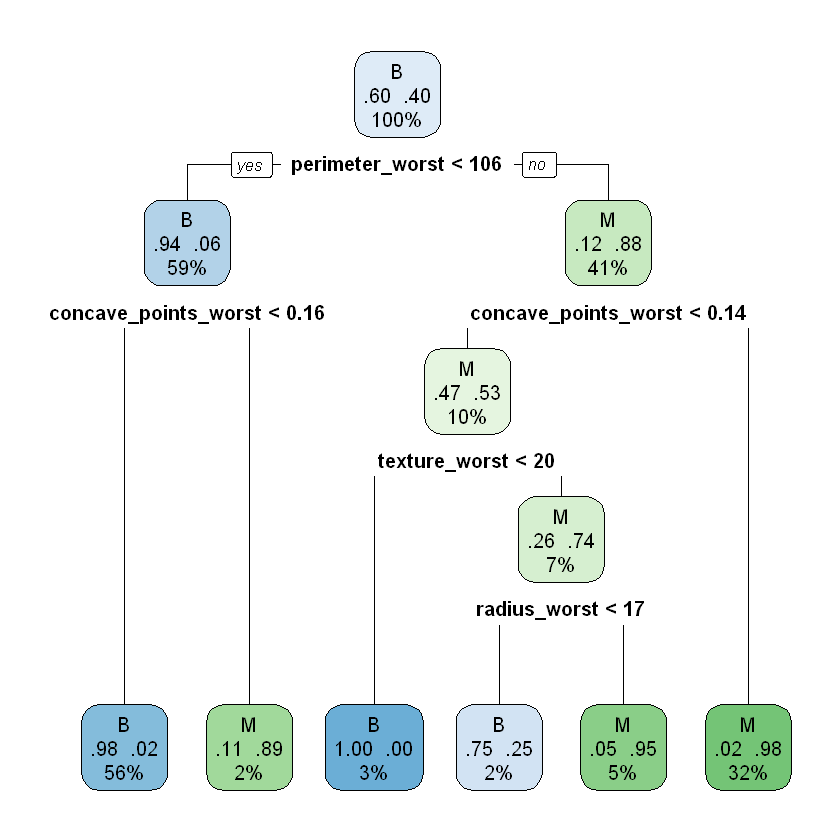

In [29]:
fit <- rpart(Diagnosis~., data = train, method = 'class',
             control = rpart.control(cp = 0))
rpart.plot(fit, extra =104)


#Checking the complexity plot


Classification tree:
rpart(formula = Diagnosis ~ ., data = train, method = "class", 
    control = rpart.control(cp = 0))

Variables actually used in tree construction:
[1] concave_points_worst perimeter_worst      radius_worst        
[4] texture_worst       

Root node error: 158/398 = 0.39698

n= 398 

        CP nsplit rel error  xerror     xstd
1 0.791139      0  1.000000 1.00000 0.061778
2 0.044304      1  0.208861 0.31013 0.041487
3 0.034810      2  0.164557 0.23418 0.036665
4 0.025316      4  0.094937 0.20886 0.034818
5 0.000000      5  0.069620 0.20886 0.034818


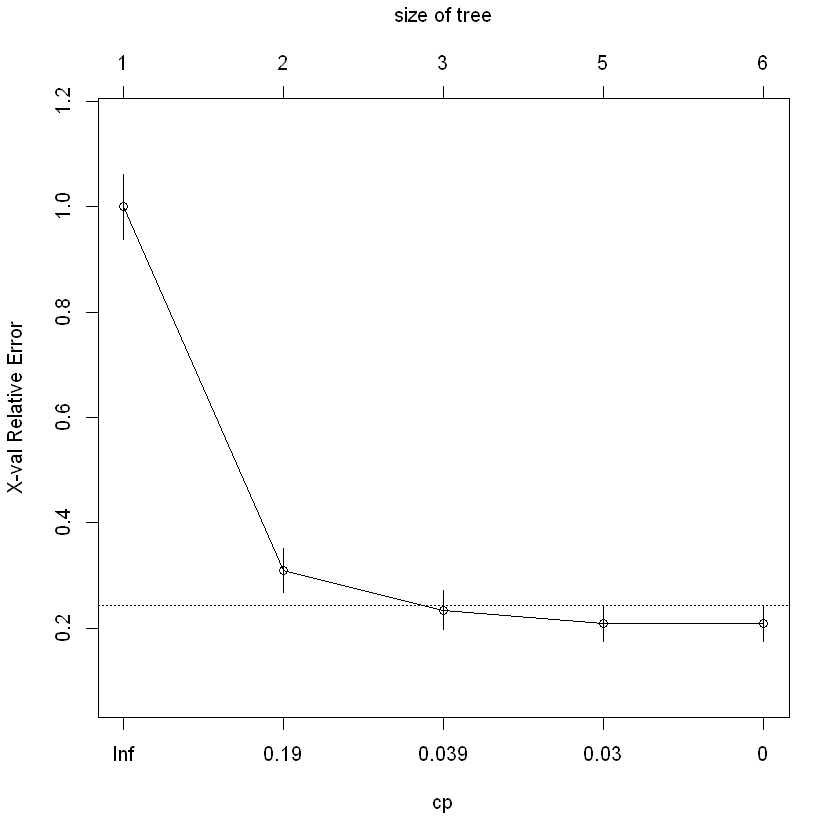

In [30]:
printcp(fit)
plotcp(fit)

#Fancy plot of model

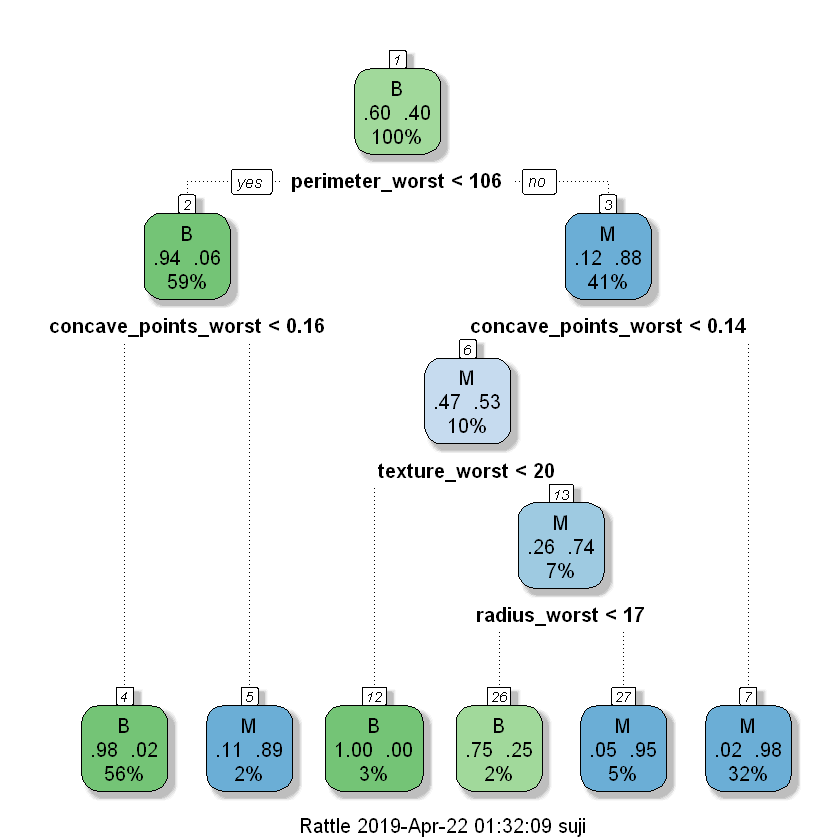

In [31]:
fancyRpartPlot(fit)

#Prediction for test data

In [32]:
predict_test <-predict(fit, test, type = 'class')
confusionMatrix(predict_test,test$Diagnosis )
table_mat <- table(test$Diagnosis, predict_test)

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 113   4
         M   4  50
                                          
               Accuracy : 0.9532          
                 95% CI : (0.9099, 0.9796)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.8917          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9658          
            Specificity : 0.9259          
         Pos Pred Value : 0.9658          
         Neg Pred Value : 0.9259          
             Prevalence : 0.6842          
         Detection Rate : 0.6608          
   Detection Prevalence : 0.6842          
      Balanced Accuracy : 0.9459          
                                          
       'Positive' Class : B               
                                          

#Computing the accuracy test for test data

In [33]:
accuracy_Test <- sum(diag(table_mat)) / sum(table_mat)
print(paste('Accuracy for test', accuracy_Test))
DT_accuracy <- mean(predict_test == test$Diagnosis)

[1] "Accuracy for test 0.953216374269006"


#Area under curve

Area under the curve: 0.9601

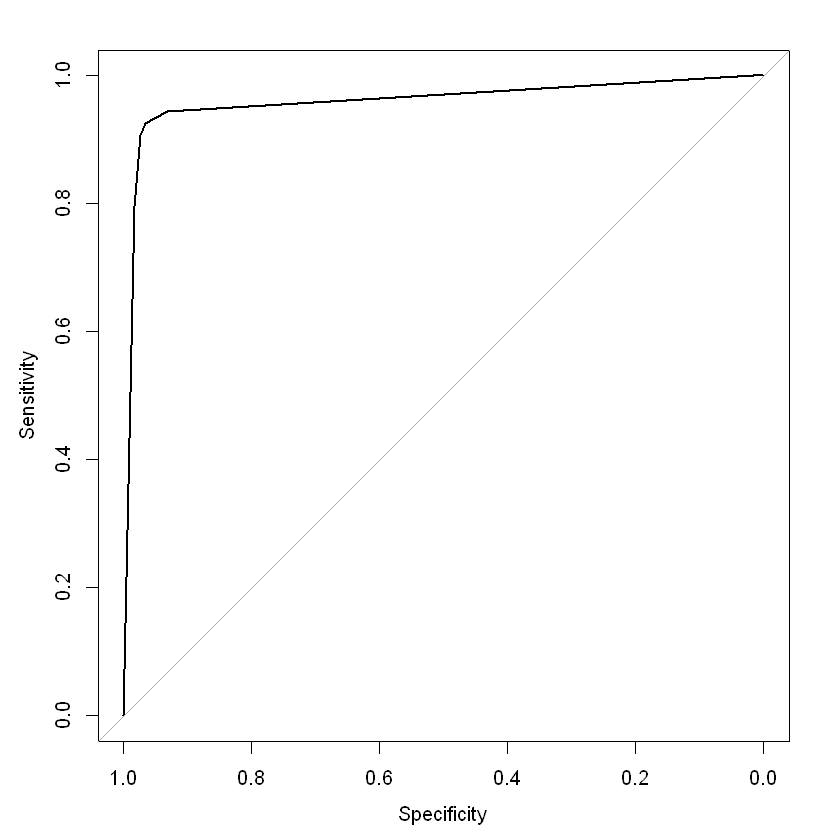

In [34]:
predict_test <-predict(fit, test, type = 'prob')
auc(test$Diagnosis,predict_test[,2])
plot(roc(test$Diagnosis,predict_test[,2]))

#Pruning to improve Decision tree

In [35]:
prune_decison_tree <- rpart(Diagnosis~., data = train, method = 'class', 
                          control = rpart.control(cp = 0, maxdepth = 8,minsplit = 100))

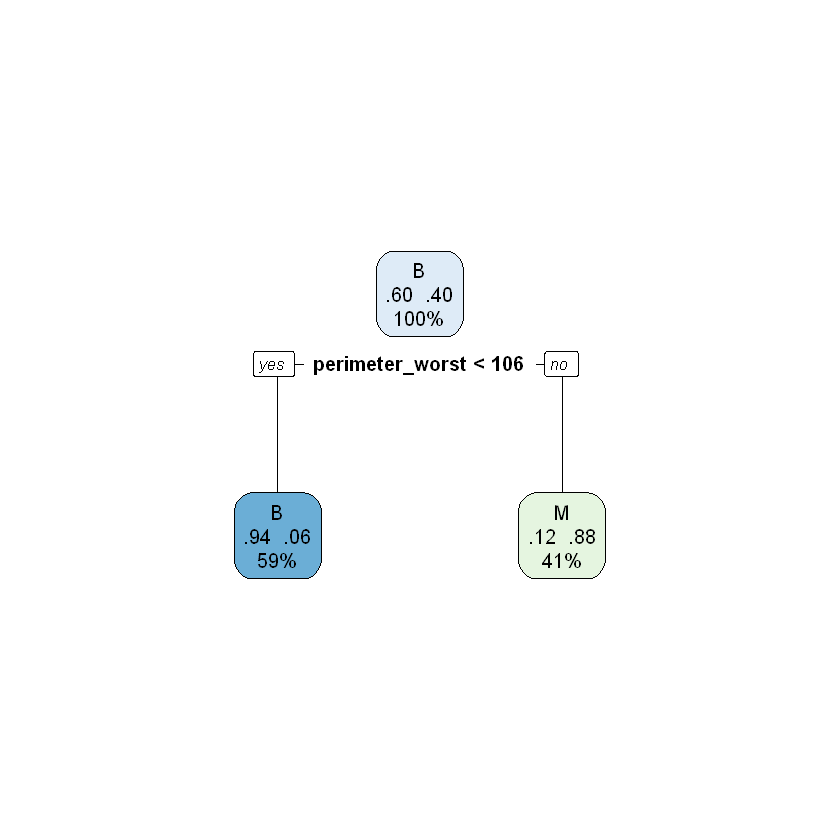

In [36]:
rpart.plot(prune_decison_tree, extra =104)

#Compute the accuracy of the pruned tree

In [38]:
predprune_decison <- predict(prune_decison_tree, test, type = "class")
accuracy_preprun <- mean(predprune_decison== test$Diagnosis)
print(paste('Accuracy for test', accuracy_preprun))

[1] "Accuracy for test 0.923976608187134"


#Prune the fit model based on the optimal cp value

In [39]:
model_pruned <- prune(fit, cp = 0.79)

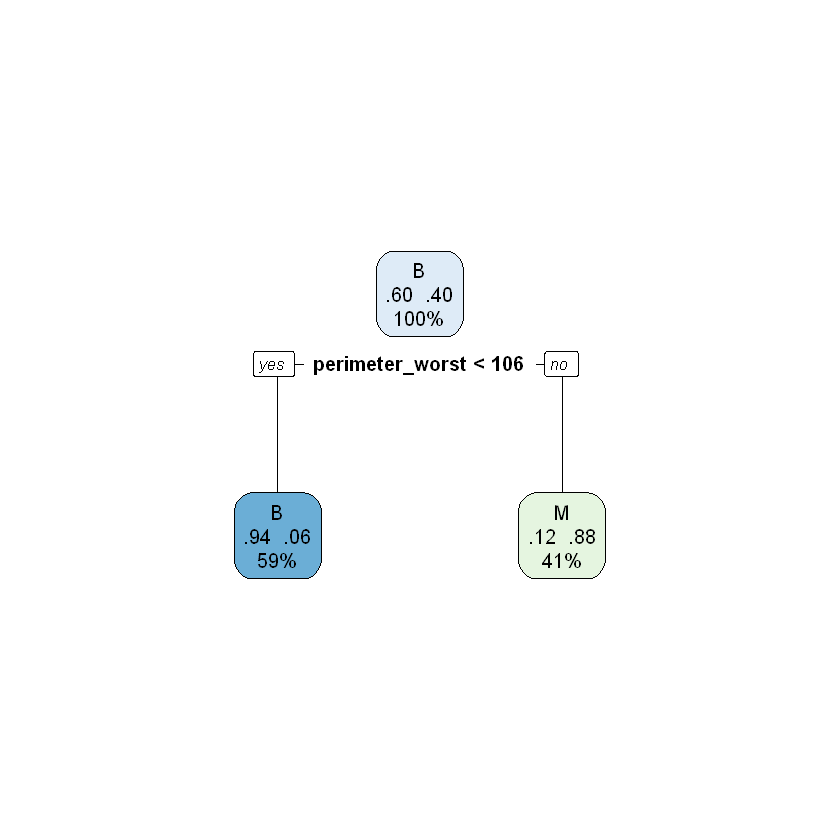

In [40]:
rpart.plot(model_pruned, extra =104)

#Compute the accuracy of the pruned tree

In [46]:
pred_pruned <- predict(model_pruned, test, type = "class")
accuracy_postprun <- mean(pred_pruned == test$Diagnosis)
print(paste('Accuracy for test', accuracy_postprun))
data.frame(DT_accuracy, accuracy_preprun, accuracy_postprun)

[1] "Accuracy for test 0.923976608187134"


DT_accuracy,accuracy_preprun,accuracy_postprun
0.9532164,0.9239766,0.9239766


#Pruning has not improved Decision tree model

# Building the SVM model for classification

#Training with SVM Linear model

In [48]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3,summaryFunction=twoClassSummary,
                       classProbs=TRUE)
levels(train$Diagnosis) <- list(B="0", M="1") 
set.seed(123)
svm_Linear <- train(Diagnosis ~., data = train, method = "svmLinear",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    metric="ROC",
                    tuneLength = 10)
print(svm_Linear)

Support Vector Machines with Linear Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 358, 358, 359, 358, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9928356  0.9805556  0.9320833

Tuning parameter 'C' was held constant at a value of 1


#Prediction for test

In [49]:
test_pred <- predict(svm_Linear, newdata = test)
cm<-confusionMatrix(test_pred, test$Diagnosis )
cm

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 117   4
         M   0  50
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9412, 0.9936)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9448          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9259          
         Pos Pred Value : 0.9669          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6842          
         Detection Rate : 0.6842          
   Detection Prevalence : 0.7076          
      Balanced Accuracy : 0.9630          
                                          
       'Positive' Class : B               
                                          

In [51]:
Accuracy_SVMLinear <- mean(test_pred == test$Diagnosis)
Accuracy_SVMLinear

[1] 0.9766082

In [52]:
pred <- predict(svm_Linear, newdata = test,type = 'prob')
pred_val <-prediction(pred[,2], test$Diagnosis)
pred_val


An object of class "prediction"
Slot "predictions":
[[1]]
  [1] 9.201160e-03 6.119450e-03 4.511914e-02 9.960486e-01 2.307172e-01
  [6] 2.853192e-02 9.986798e-01 2.853482e-03 1.000000e+00 9.861599e-01
 [11] 9.175337e-02 9.999844e-01 9.481879e-03 1.734017e-02 8.935507e-01
 [16] 3.665061e-03 9.993709e-01 9.865199e-01 8.590238e-03 6.174194e-03
 [21] 1.000000e+00 1.855471e-03 4.350917e-02 7.151307e-04 1.178083e-02
 [26] 9.999983e-01 1.754150e-02 6.447109e-02 1.047867e-03 9.884049e-01
 [31] 7.236853e-03 9.605970e-03 9.949319e-01 5.997699e-02 4.598531e-04
 [36] 1.033603e-01 5.304841e-01 9.412687e-04 8.005387e-04 2.477068e-02
 [41] 2.121566e-01 9.999764e-01 1.679090e-01 2.222992e-03 6.443721e-03
 [46] 3.606548e-03 2.766846e-03 1.176165e-02 9.678318e-01 9.993551e-01
 [51] 9.999202e-01 1.000000e+00 7.988075e-02 9.998701e-01 2.889171e-03
 [56] 9.999783e-01 4.958088e-01 9.999886e-01 1.212698e-01 1.636814e-02
 [61] 1.313807e-02 2.065664e-03 9.999932e-01 1.000000e+00 9.510326e-02
 [66] 9.937047e-01 

#Calculating Area under Curve

Area under the curve: 0.9975

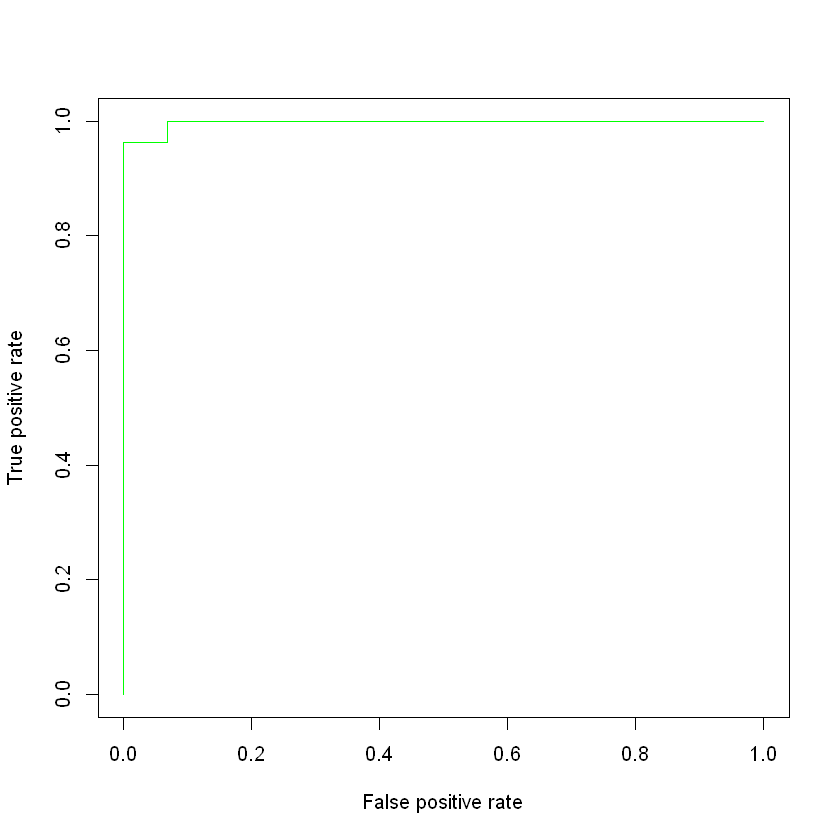

In [53]:
perf_val<-performance(pred_val, "tpr", "fpr")
plot(perf_val, col = "green", lwd = 1.5)
auc(test$Diagnosis,pred[,2])

#Tuning SVM_Linear model by setting grid c value

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message:
"model fit failed for Fold01.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: C=0.00 Error in .local(x, ...) : 
  No Suppo

Support Vector Machines with Linear Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 358, 358, 359, 358, ... 
Resampling results across tuning parameters:

  C     ROC        Sens       Spec     
  0.00  0.5000000        NaN        NaN
  0.01  0.9930324  0.9861111  0.9556944
  0.05  0.9940683  0.9819444  0.9576389
  0.10  0.9946991  0.9847222  0.9575000
  0.25  0.9942535  0.9791667  0.9383333
  0.50  0.9929456  0.9833333  0.9276389
  0.75  0.9931134  0.9847222  0.9298611
  1.00  0.9928356  0.9819444  0.9320833
  1.25  0.9924884  0.9833333  0.9295833
  1.50  0.9916840  0.9833333  0.9295833
  1.75  0.9919271  0.9805556  0.9316667
  2.00  0.9916667  0.9819444  0.9363889
  5.00  0.9905266  0.9888889  0.9365278

ROC was used to select the optimal model using the largest value.
The final value used for the model was C = 0.1.

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 117   4
         M   0  50
                                          
               Accuracy : 0.9766          
                 95% CI : (0.9412, 0.9936)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9448          
 Mcnemar's Test P-Value : 0.1336          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9259          
         Pos Pred Value : 0.9669          
         Neg Pred Value : 1.0000          
             Prevalence : 0.6842          
         Detection Rate : 0.6842          
   Detection Prevalence : 0.7076          
      Balanced Accuracy : 0.9630          
                                          
       'Positive' Class : B               
                                          

[1] 0.9766082

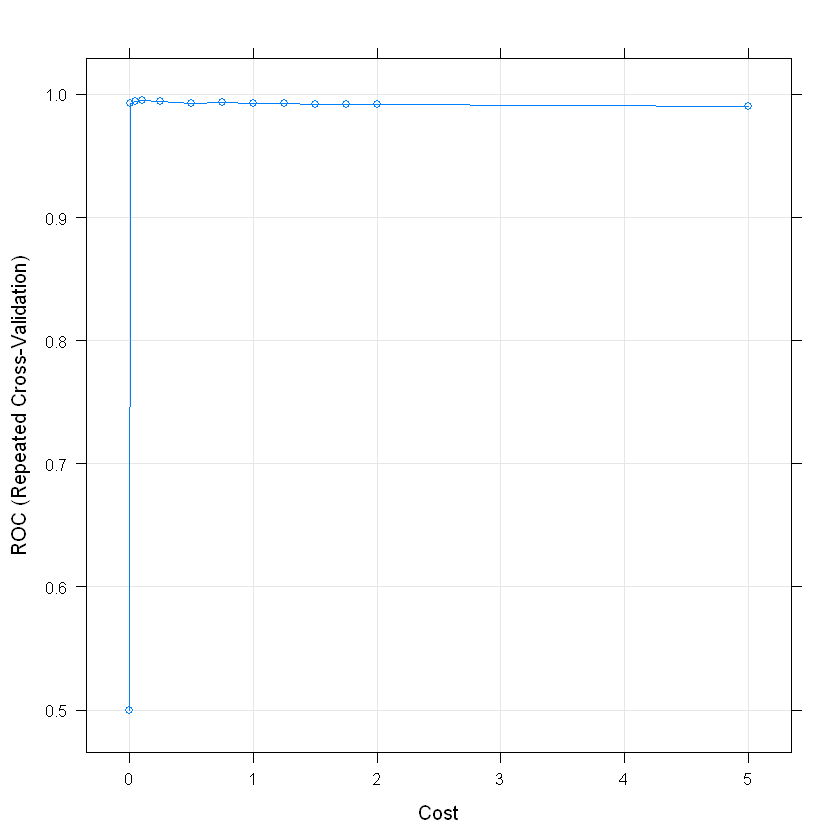

In [54]:
grid <- expand.grid(C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,5))
set.seed(123)
svm_Linear_Grid <- train(Diagnosis ~., data = train, method = "svmLinear",
                           trControl=trctrl,
                           preProcess = c("center", "scale"),
                           tuneGrid = grid,
                           tuneLength = 10)
svm_Linear_Grid
plot(svm_Linear_Grid)
test_pred_grid <- predict(svm_Linear_Grid, newdata = test)
confusionMatrix(test_pred_grid, test$Diagnosis)
Accuracy_SVMLinearGrid <- mean(test_pred_grid == test$Diagnosis)
Accuracy_SVMLinearGrid

#SVM Classifier using Non-Linear Kernel

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

Support Vector Machines with Radial Basis Function Kernel 

398 samples
 28 predictor
  2 classes: 'B', 'M' 

Pre-processing: centered (28), scaled (28) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 358, 358, 358, 358, 359, 358, ... 
Resampling results across tuning parameters:

  C       ROC        Sens       Spec     
    0.25  0.9914294  0.9597222  0.9361111
    0.50  0.9933738  0.9708333  0.9573611
    1.00  0.9957639  0.9763889  0.9661111
    2.00  0.9961979  0.9805556  0.9598611
    4.00  0.9953935  0.9847222  0.9618056
    8.00  0.9948495  0.9819444  0.9681944
   16.00  0.9932234  0.9680556  0.9618056
   32.00  0.9927894  0.9680556  0.9597222
   64.00  0.9927894  0.9680556  0.9533333
  128.00  0.9927894  0.9694444  0.9576389

Tuning parameter 'sigma' was held constant at a value of 0.04584642
ROC was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.04584642 and C = 2.

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 115   3
         M   2  51
                                          
               Accuracy : 0.9708          
                 95% CI : (0.9331, 0.9904)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.932           
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9829          
            Specificity : 0.9444          
         Pos Pred Value : 0.9746          
         Neg Pred Value : 0.9623          
             Prevalence : 0.6842          
         Detection Rate : 0.6725          
   Detection Prevalence : 0.6901          
      Balanced Accuracy : 0.9637          
                                          
       'Positive' Class : B               
                                          

[1] 0.9707602

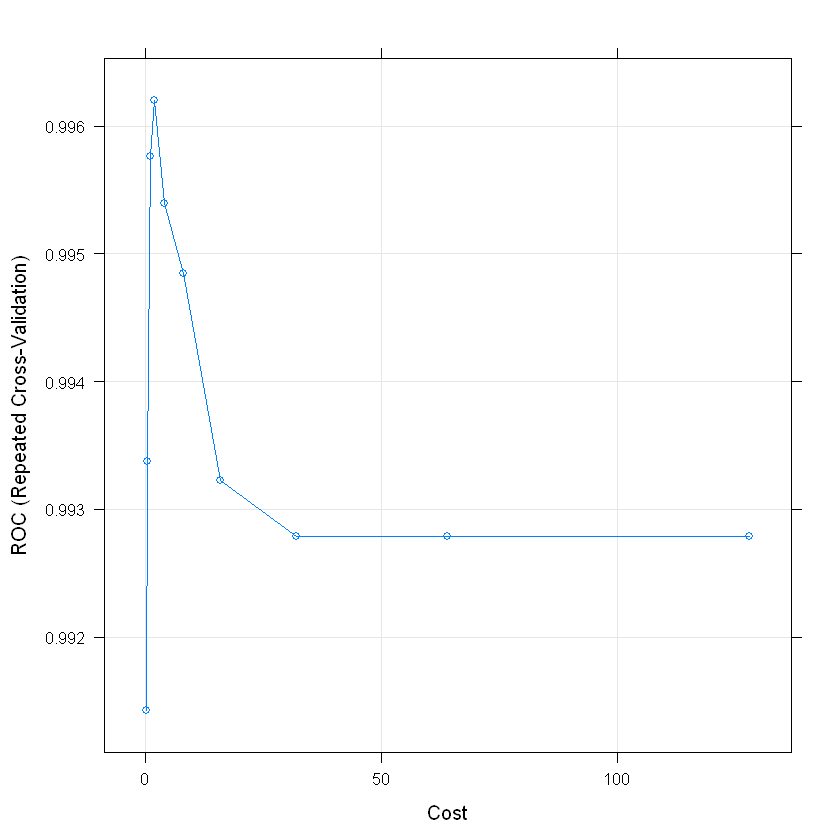

In [55]:
set.seed(123)
svm_Radial <- train(Diagnosis ~., data = train, method = "svmRadial",
                      trControl=trctrl,
                      preProcess = c("center", "scale"),
                      tuneLength = 10)
svm_Radial
test_pred_Radial <- predict(svm_Radial, newdata = test)
confusionMatrix(test_pred_Radial, test$Diagnosis )
plot(svm_Radial)
Accuracy_SVMRadial <- mean(test_pred_Radial == test$Diagnosis)
Accuracy_SVMRadial

#Tuning SVM_Radial model by setting grid c value

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."Warning message:
"model fit failed for Fold01.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit fai

maximum number of iterations reached 0.0002497068 0.0002460514maximum number of iterations reached 0.006110836 0.005870756maximum number of iterations reached 0.008499327 0.008040148maximum number of iterations reached 0.0001137356 0.0001087766maximum number of iterations reached 0.001889478 0.001791232

Warning message:
"model fit failed for Fold02.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0003402913 0.0003349659maximum number of iterations reached 0.006530111 0.006279729maximum number of iterations reached 0.007490058 0.007097732maximum number of iterations reached 0.0002360545 0.0002257169maximum number of iterations reached 2.4868e-05 2.288437e-05

Warning message:
"model fit failed for Fold03.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0002073446 0.0002042433maximum number of iterations reached 0.006423993 0.006122148maximum number of iterations reached 0.006212048 0.005894997maximum number of iterations reached 0.001361989 0.001286279

Warning message:
"model fit failed for Fold04.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 1.152527e-05 1.139736e-05maximum number of iterations reached 0.007004129 0.006696329maximum number of iterations reached 0.00899411 0.008485283maximum number of iterations reached 1.204025e-05 1.153991e-05maximum number of iterations reached 0.0019296 0.001830881

Warning message:
"model fit failed for Fold05.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0009280252 0.0009087614maximum number of iterations reached 0.00307188 0.002981725maximum number of iterations reached 0.008612942 0.0082147maximum number of iterations reached 0.0001739431 0.0001660844maximum number of iterations reached 0.0004431742 0.0004242562maximum number of iterations reached 0.0003644972 0.0003348457

Warning message:
"model fit failed for Fold06.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0008288905 0.0008121431maximum number of iterations reached 0.007108176 0.006804379maximum number of iterations reached 0.007700713 0.007305796maximum number of iterations reached 2.125781e-05 2.034631e-05maximum number of iterations reached 0.0003923094 0.0003741371

Warning message:
"model fit failed for Fold07.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0003585613 0.000352706maximum number of iterations reached 0.004668762 0.00447567maximum number of iterations reached 0.008228529 0.007727636maximum number of iterations reached 5.817135e-05 5.560959e-05maximum number of iterations reached 4.331728e-05 4.159356e-05

Warning message:
"model fit failed for Fold08.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.000951377 0.0009317846maximum number of iterations reached 0.007550334 0.007192726maximum number of iterations reached 0.009072877 0.008536658maximum number of iterations reached 1.247762e-05 1.194886e-05maximum number of iterations reached 0.001848976 0.001754613

Warning message:
"model fit failed for Fold09.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001763812 0.001718486maximum number of iterations reached 0.004804774 0.00458195maximum number of iterations reached 0.008467171 0.007956806maximum number of iterations reached 9.865969e-06 9.448009e-06maximum number of iterations reached 0.000767723 0.0007284328

Warning message:
"model fit failed for Fold10.Rep1: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep1: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001228966 0.001204919maximum number of iterations reached 0.00645224 0.006140855maximum number of iterations reached 0.008060605 0.007574166maximum number of iterations reached 3.602408e-05 3.448111e-05maximum number of iterations reached 0.0001551921 0.0001486486

Warning message:
"model fit failed for Fold01.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001228798 0.001200354maximum number of iterations reached 0.006908016 0.006596955maximum number of iterations reached 0.008054131 0.007603939maximum number of iterations reached 9.295809e-06 8.901817e-06maximum number of iterations reached 0.0002052668 0.0001967605

Warning message:
"model fit failed for Fold02.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0002768575 0.0002724438maximum number of iterations reached 0.005942788 0.005701913maximum number of iterations reached 0.008049712 0.007596031maximum number of iterations reached 9.187951e-05 8.778658e-05maximum number of iterations reached 0.001576977 0.001489876

Warning message:
"model fit failed for Fold03.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001099941 0.001072939maximum number of iterations reached 0.005300523 0.005084995maximum number of iterations reached 0.008574552 0.00813199maximum number of iterations reached 0.0009296592 0.0008819037

Warning message:
"model fit failed for Fold04.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0001866804 0.0001840138maximum number of iterations reached 0.005540134 0.0053118maximum number of iterations reached 0.008476797 0.00798627maximum number of iterations reached 6.840258e-05 6.541115e-05maximum number of iterations reached 0.0009185641 0.0008731143

Warning message:
"model fit failed for Fold05.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001469482 0.001428261maximum number of iterations reached 0.006568221 0.006266222maximum number of iterations reached 0.007655785 0.007216072maximum number of iterations reached 8.997522e-05 8.631698e-05

Warning message:
"model fit failed for Fold06.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0009167521 0.0009008642maximum number of iterations reached 0.005010463 0.004844234maximum number of iterations reached 0.009253631 0.008804365maximum number of iterations reached 0.001684077 0.001595997

Warning message:
"model fit failed for Fold07.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0008552357 0.0008390226maximum number of iterations reached 0.00634284 0.006068165maximum number of iterations reached 0.008026836 0.007561148maximum number of iterations reached 5.476102e-05 5.233233e-05maximum number of iterations reached 0.002710011 0.002557789maximum number of iterations reached 1.224791e-05 1.128407e-05

Warning message:
"model fit failed for Fold08.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001087845 0.001068459maximum number of iterations reached 0.005967591 0.005734321maximum number of iterations reached 0.008757655 0.008291821maximum number of iterations reached 0.000199017 0.0001902289maximum number of iterations reached 0.002191682 0.002065797

Warning message:
"model fit failed for Fold09.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0008324962 0.0008165453maximum number of iterations reached 0.006069515 0.005806612maximum number of iterations reached 0.008201408 0.007734238maximum number of iterations reached 0.0004046731 0.0003852224

Warning message:
"model fit failed for Fold10.Rep2: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep2: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.00153165 0.001500361maximum number of iterations reached 0.005119543 0.004923376maximum number of iterations reached 0.009156308 0.00869952maximum number of iterations reached 0.0003517415 0.0003354454maximum number of iterations reached 0.0006681126 0.000637791

Warning message:
"model fit failed for Fold01.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold01.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001385165 0.001355895maximum number of iterations reached 0.007195041 0.006872473maximum number of iterations reached 0.008621907 0.008134864maximum number of iterations reached 0.001755488 0.001665383

Warning message:
"model fit failed for Fold02.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold02.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0009236999 0.0009041744maximum number of iterations reached 0.007031803 0.006705217maximum number of iterations reached 0.007972028 0.007568167maximum number of iterations reached 0.0004534839 0.0004339744

Warning message:
"model fit failed for Fold03.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold03.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0002488357 0.0002450818maximum number of iterations reached 0.006415476 0.006099464maximum number of iterations reached 0.008199379 0.007766066maximum number of iterations reached 0.000609899 0.0005818176

Warning message:
"model fit failed for Fold04.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold04.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001363271 0.001329938maximum number of iterations reached 0.006773304 0.006464747maximum number of iterations reached 0.008162325 0.007688562maximum number of iterations reached 0.00177146 0.001676244maximum number of iterations reached 0.0001029679 9.465856e-05

Warning message:
"model fit failed for Fold05.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold05.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0009263128 0.0009055772maximum number of iterations reached 0.005493575 0.005219931maximum number of iterations reached 0.00660235 0.006286787maximum number of iterations reached 7.76737e-05 7.423574e-05maximum number of iterations reached 0.0009740248 0.0009257018

Warning message:
"model fit failed for Fold06.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold06.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.002144116 0.002091486maximum number of iterations reached 0.006864267 0.006535679maximum number of iterations reached 0.008779297 0.008260576maximum number of iterations reached 0.0001243182 0.0001187579maximum number of iterations reached 0.0003331147 0.0003190771maximum number of iterations reached 0.0002594165 0.0002384752

Warning message:
"model fit failed for Fold07.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold07.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0003238768 0.0003193401maximum number of iterations reached 0.004602886 0.004455549maximum number of iterations reached 0.00881374 0.008364648maximum number of iterations reached 7.222913e-05 6.928377e-05

Warning message:
"model fit failed for Fold08.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold08.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0004671041 0.0004595714maximum number of iterations reached 0.005462829 0.005215192maximum number of iterations reached 0.008009415 0.007625077maximum number of iterations reached 8.012771e-05 7.696111e-05

Warning message:
"model fit failed for Fold09.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold09.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.0008116238 0.0007955982maximum number of iterations reached 0.006779086 0.006486058maximum number of iterations reached 0.008730184 0.008286513maximum number of iterations reached 0.0001039661 9.950666e-05maximum number of iterations reached 0.0003782068 0.000361759

Warning message:
"model fit failed for Fold10.Rep3: sigma=0.000, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.010, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.020, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.025, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.030, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters
"Warning message:
"model fit failed for Fold10.Rep3: sigma=0.040, C=0.00 Error in .local(x, ...) : 
  No Support Vectors found. You may want to change your parameters

maximum number of iterations reached 0.001184138 0.001153664maximum number of iterations reached 0.007738005 0.007330039maximum number of iterations reached 0.006892381 0.006531996maximum number of iterations reached 2.329412e-05 2.22861e-05maximum number of iterations reached 3.644643e-05 3.498643e-05

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Confusion Matrix and Statistics

          Reference
Prediction   B   M
         B 115   1
         M   2  53
                                          
               Accuracy : 0.9825          
                 95% CI : (0.9496, 0.9964)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9596          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9829          
            Specificity : 0.9815          
         Pos Pred Value : 0.9914          
         Neg Pred Value : 0.9636          
             Prevalence : 0.6842          
         Detection Rate : 0.6725          
   Detection Prevalence : 0.6784          
      Balanced Accuracy : 0.9822          
                                          
       'Positive' Class : B               
                                          

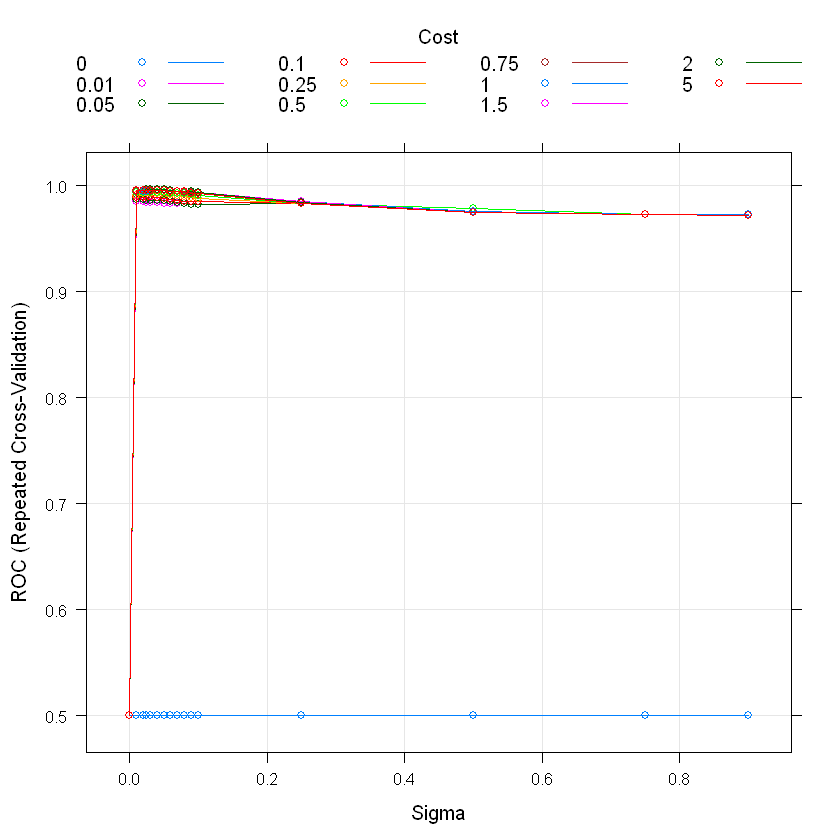

In [56]:
grid_radial <- expand.grid(sigma = c(0,0.01, 0.02, 0.025, 0.03, 0.04,
                                     0.05, 0.06, 0.07,0.08, 0.09, 0.1, 0.25, 0.5, 0.75,0.9),
                           C = c(0,0.01, 0.05, 0.1, 0.25, 0.5, 0.75,
                                 1, 1.5, 2,5))
set.seed(123)
svm_Radial_Grid <- train(Diagnosis~., data = train, method = "svmRadial",
                           trControl=trctrl,
                           preProcess = c("center", "scale"),
                           tuneGrid = grid_radial,
                           tuneLength = 10)
test_pred_Radial_Grid <- predict(svm_Radial_Grid, newdata = test)
confusionMatrix(test_pred_Radial_Grid, test$Diagnosis )
plot(svm_Radial_Grid)
Accuracy_SVMRadialGrid <- mean(test_pred_Radial_Grid == test$Diagnosis)

In [57]:
data.frame(Accuracy_SVMLinear, Accuracy_SVMLinearGrid, Accuracy_SVMRadial,Accuracy_SVMRadialGrid)

Accuracy_SVMLinear,Accuracy_SVMLinearGrid,Accuracy_SVMRadial,Accuracy_SVMRadialGrid
0.9766082,0.9766082,0.9707602,0.9824561


#SVM model performed better than other models with good Accuracy and highest Area under curve.
